#### Import Module

In [3]:
import os, sys
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

from setting import *

#### Load Data

In [4]:
data = pd.read_csv('../../selected_data/0_content/kpca_512_0.csv')
data

,id,KernelPCA_1,KernelPCA_2,KernelPCA_3,KernelPCA_4,KernelPCA_5,KernelPCA_6,KernelPCA_7,KernelPCA_8,KernelPCA_9,...,KernelPCA_504,KernelPCA_505,KernelPCA_506,KernelPCA_507,KernelPCA_508,KernelPCA_509,KernelPCA_510,KernelPCA_511,KernelPCA_512,success_x
0,NMN2,-0.138246,0.036567,0.082271,0.037340,0.155053,0.050938,-0.130418,0.040669,0.033376,...,0.040275,0.015853,-0.031735,-0.011062,-0.003371,-0.011977,-0.011984,-0.018015,0.016833,1
1,ZENLET-The-Dual,-0.139955,0.012546,-0.148817,-0.031963,-0.109504,0.016241,0.030163,-0.029444,0.000952,...,0.009723,-0.009805,0.018914,0.025789,0.012867,0.019338,0.009424,0.020594,-0.012515,1
2,hhl-penzhai,-0.049257,-0.005561,0.009708,-0.008414,0.051698,0.004658,-0.039619,-0.030229,0.076187,...,0.016700,0.021440,0.043783,-0.018080,0.001808,-0.015084,-0.008512,0.016661,0.020257,1
3,scion-36,-0.199095,0.055403,-0.062529,0.059909,-0.051592,0.063197,-0.012253,-0.042943,-0.042190,...,0.003727,0.024787,0.006676,0.035888,-0.008789,-0.023927,-0.017880,-0.002108,-0.019633,1
4,amt-cube,-0.195516,0.069270,0.065035,-0.068220,-0.083179,0.046300,0.035080,-0.019613,0.105303,...,0.001095,-0.003412,0.003538,0.019887,-0.001007,-0.014367,-0.000852,-0.035581,0.028643,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607,wlm-tw,0.172979,-0.117111,0.047955,-0.033465,0.014347,-0.002942,-0.039723,-0.063459,-0.128755,...,-0.022170,0.030297,-0.022903,-0.046242,-0.014496,0.010581,-0.001528,0.004309,-0.002075,0
5608,8bowchou,0.220385,-0.192078,0.099490,-0.131975,0.025775,0.059521,0.156520,0.098922,-0.089540,...,-0.029342,-0.020797,0.016399,-0.016537,-0.020213,-0.011304,0.004142,-0.009990,-0.017843,0
5609,bananalin,0.069515,-0.064281,-0.034925,0.015327,0.043672,0.064081,-0.037373,0.010909,0.020034,...,0.001376,-0.000409,0.004443,0.001356,-0.000253,-0.001975,-0.000844,0.000401,-0.001194,0
5610,fooddesignlab,0.115715,-0.099576,-0.011724,-0.084499,0.047634,-0.079171,0.018119,-0.108665,0.074693,...,-0.019913,0.010901,0.025974,0.011548,0.007203,-0.006881,0.004267,0.012453,-0.012604,0


In [5]:
x_data = data.iloc[:,1:-1]
y_data = data.iloc[:,-1]
y_data.value_counts()

success_x
1    4286
0    1326
Name: count, dtype: int64

In [6]:
# Normalize
scaler = MinMaxScaler()
scaler.fit(x_data)
norm_x_data = scaler.transform(x_data)

# --- Split Data ---
norm_train_x, norm_test_x, norm_train_y, norm_test_y = train_test_split(norm_x_data, y_data, test_size=0.3, random_state=30)
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.3, random_state=30)

# Undersample
sampler = RandomUnderSampler()
under_train_x, under_train_y = sampler.fit_resample(train_x, train_y)

# Undersample
sampler = RandomOverSampler()
over_train_x, over_train_y = sampler.fit_resample(train_x, train_y)

#### Naive Bayes
> ref: https://scikit-learn.org/stable/modules/naive_bayes.html
* 模型選擇： Complement NB（不可使用負數，需先經過正規化）
* 使用資料：正規化後資料

---- Normalized Data ----
Accuracy: 0.66
Recall: 0.68
Precision: 0.83
F1-Score: 0.75
F0.5-Score: 0.8
F0.3-Score: 0.82


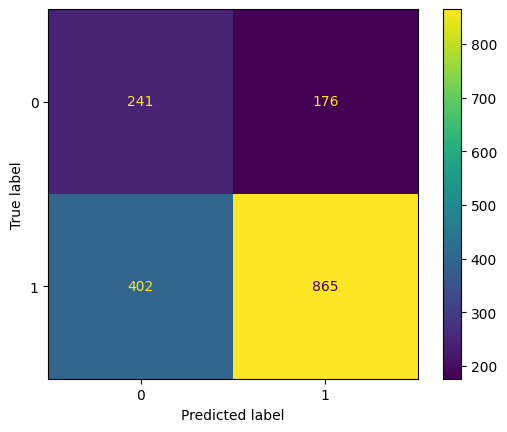

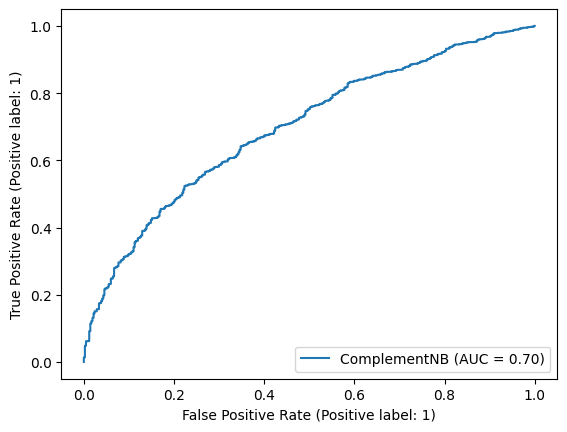

In [7]:
print('---- Normalized Data ----')

model = ComplementNB()
model.fit(norm_train_x, norm_train_y)

pred_y = model.predict(norm_test_x)

result_report(model, norm_test_x, norm_test_y, pred_y)

#### Logistic Regression
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* 模型選擇： Logistic Regression
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.76
Recall: 0.99
Precision: 0.76
F1-Score: 0.86
F0.5-Score: 0.8
F0.3-Score: 0.77


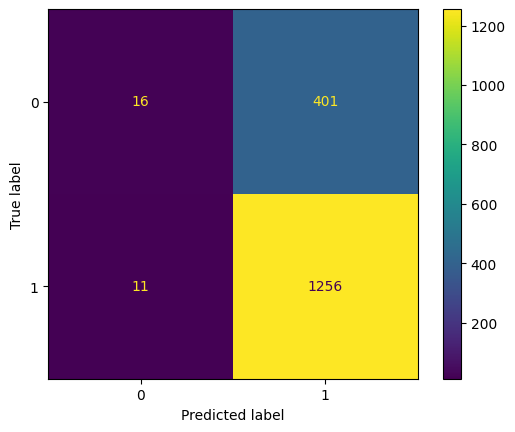

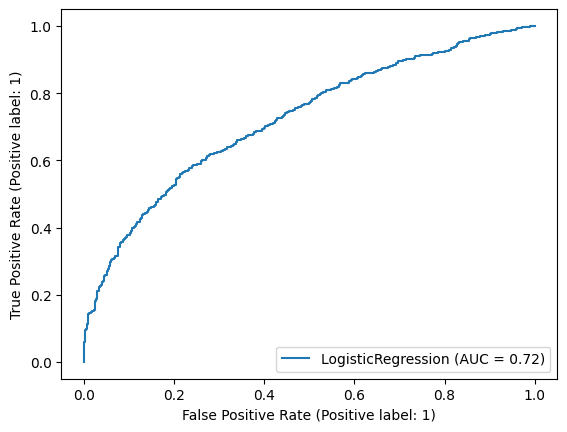

---- Under Sample Data ----
Accuracy: 0.65
Recall: 0.63
Precision: 0.87
F1-Score: 0.73
F0.5-Score: 0.81
F0.3-Score: 0.84


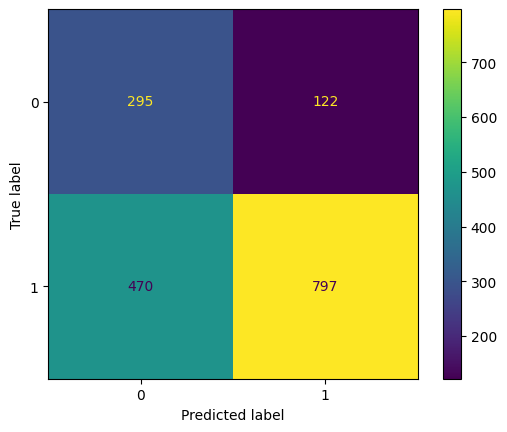

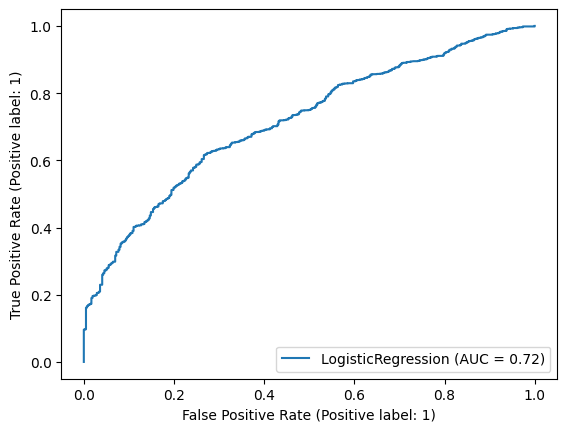

---- Over Sample Data ----
Accuracy: 0.67
Recall: 0.69
Precision: 0.84
F1-Score: 0.76
F0.5-Score: 0.81
F0.3-Score: 0.83


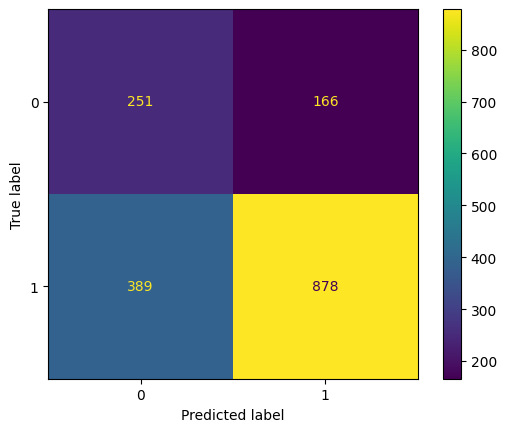

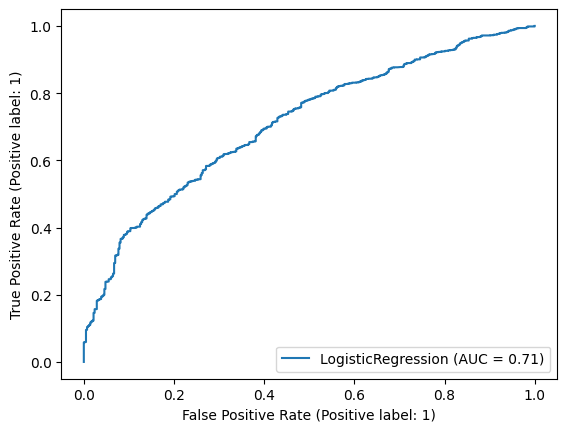

In [8]:
print('---- Original Data ----')
model = LogisticRegression()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)


print('---- Under Sample Data ----')
model = LogisticRegression()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = LogisticRegression()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### SVM
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
* 模型選擇：SVC
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.75
Recall: 0.99
Precision: 0.76
F1-Score: 0.86
F0.5-Score: 0.79
F0.3-Score: 0.77


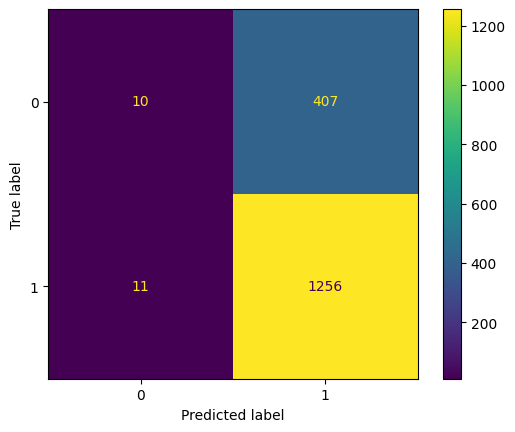

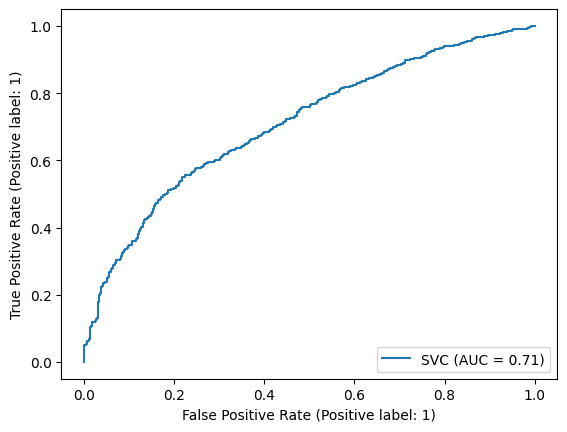

---- Under Sample Data ----
Accuracy: 0.64
Recall: 0.63
Precision: 0.85
F1-Score: 0.72
F0.5-Score: 0.79
F0.3-Score: 0.82


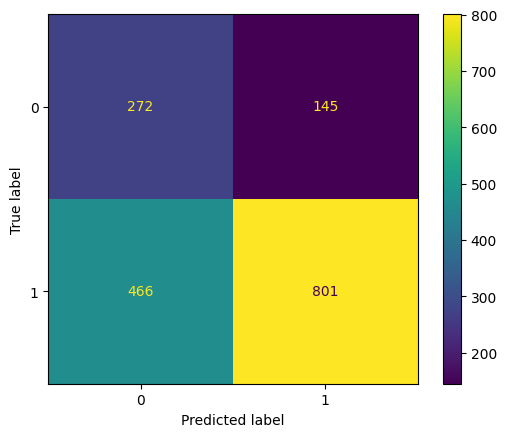

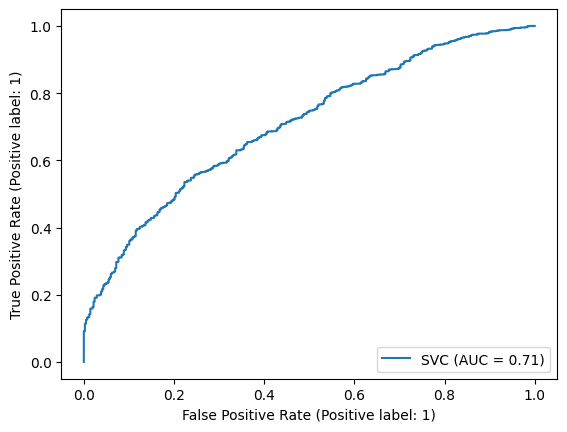

---- Over Sample Data ----
Accuracy: 0.73
Recall: 0.85
Precision: 0.81
F1-Score: 0.83
F0.5-Score: 0.81
F0.3-Score: 0.81


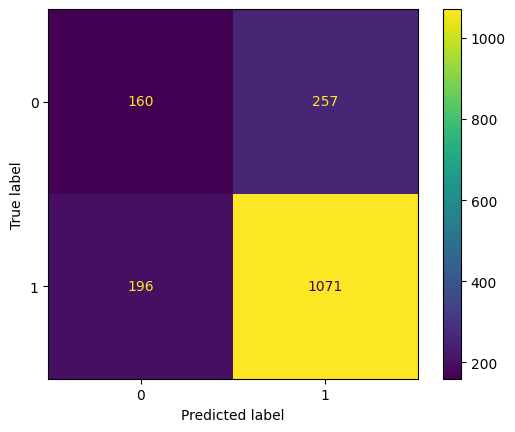

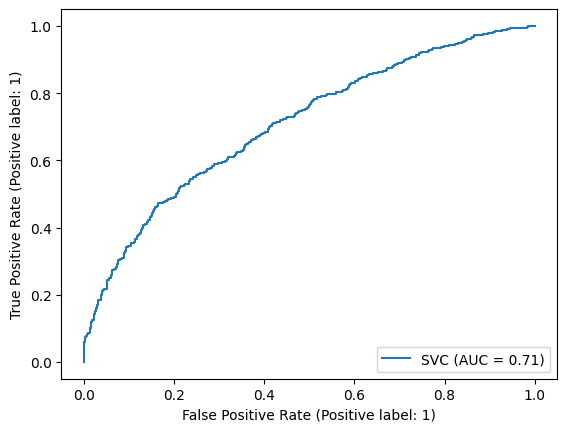

In [9]:
print('---- Original Data ----')
model = SVC()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)


print('---- Under Sample Data ----')
model = SVC()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = SVC()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### Random Forest

> ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* 模型選擇： Random Forest
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.75
Recall: 1.0
Precision: 0.75
F1-Score: 0.86
F0.5-Score: 0.79
F0.3-Score: 0.77


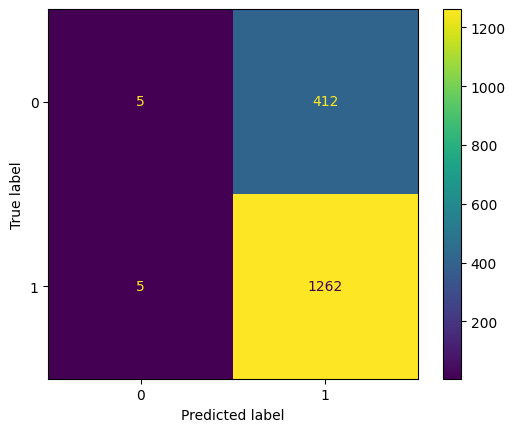

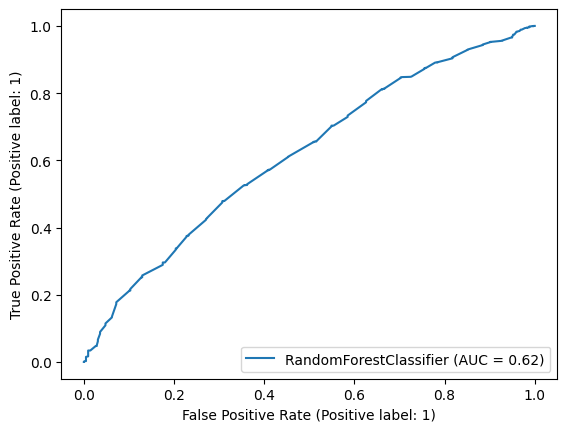

---- Under Sample Data ----
Accuracy: 0.59
Recall: 0.57
Precision: 0.83
F1-Score: 0.67
F0.5-Score: 0.76
F0.3-Score: 0.8


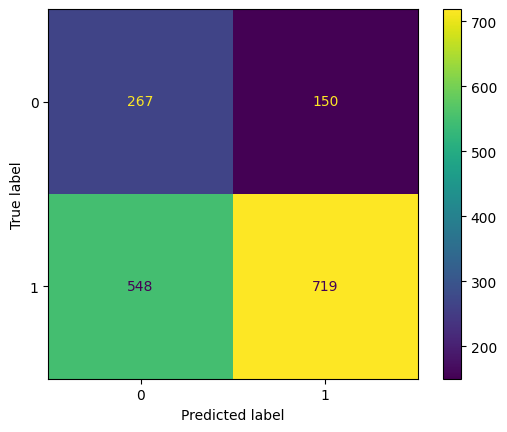

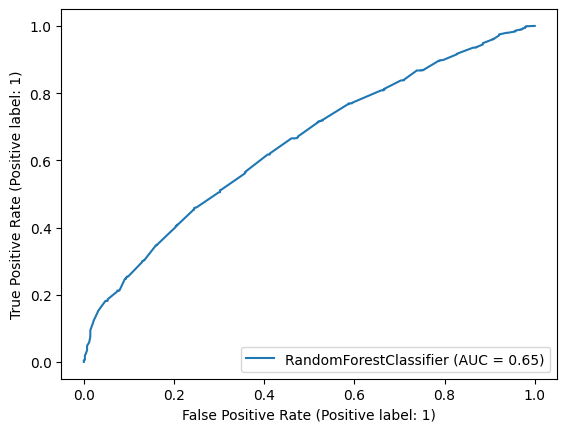

---- Over Sample Data ----
Accuracy: 0.75
Recall: 0.99
Precision: 0.75
F1-Score: 0.86
F0.5-Score: 0.79
F0.3-Score: 0.77


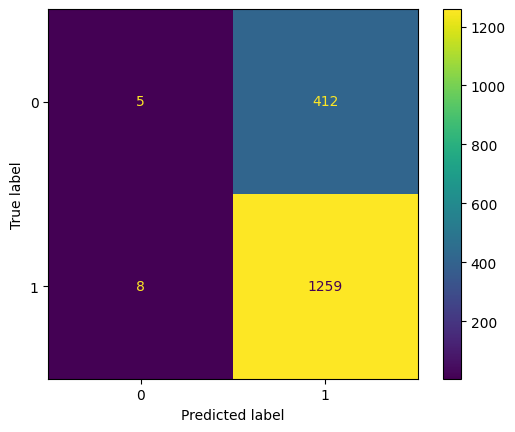

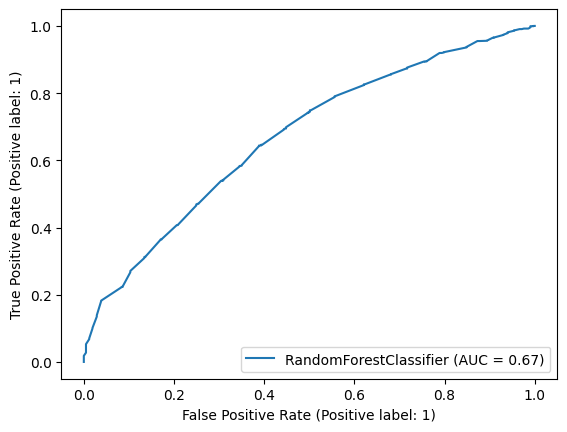

In [10]:
print('---- Original Data ----')
model = RandomForestClassifier()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Under Sample Data ----')
model = RandomForestClassifier()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = RandomForestClassifier()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

#### XGBoost
> ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
* 選擇模型：GradientBoostingClassifier
* 使用資料：原始資料、Resample 後的資料

---- Original Data ----
Accuracy: 0.75
Recall: 0.99
Precision: 0.75
F1-Score: 0.86
F0.5-Score: 0.79
F0.3-Score: 0.77


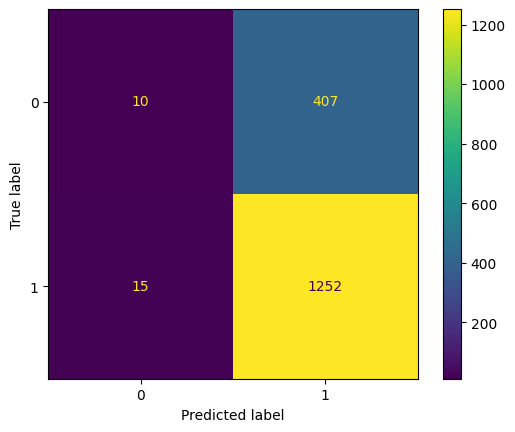

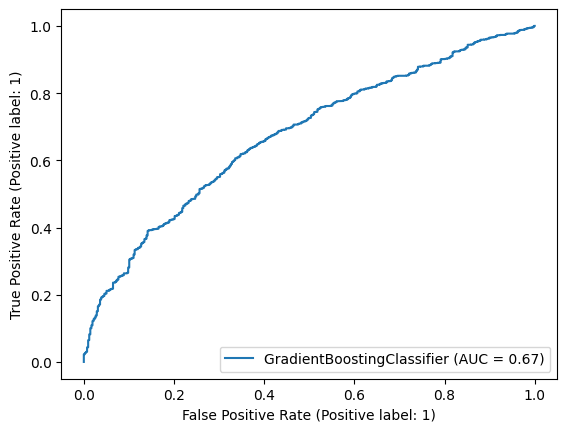

---- Under Sample Data ----
Accuracy: 0.61
Recall: 0.6
Precision: 0.84
F1-Score: 0.7
F0.5-Score: 0.78
F0.3-Score: 0.81


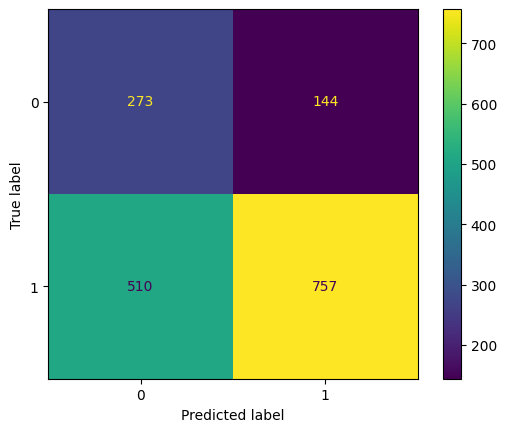

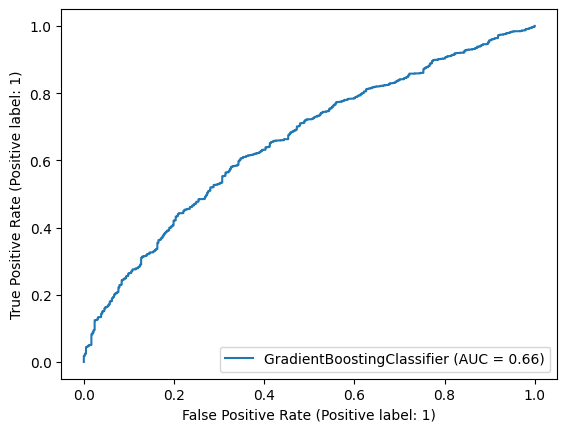

---- Over Sample Data ----
Accuracy: 0.69
Recall: 0.79
Precision: 0.8
F1-Score: 0.8
F0.5-Score: 0.8
F0.3-Score: 0.8


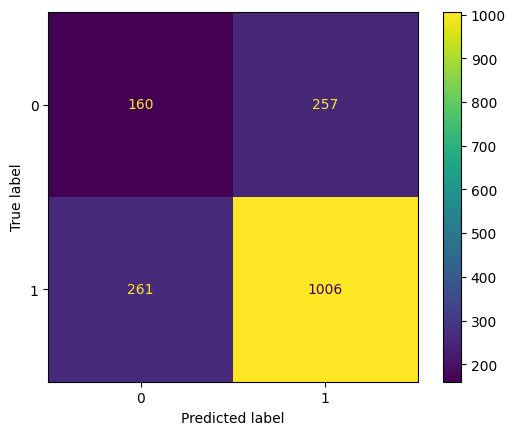

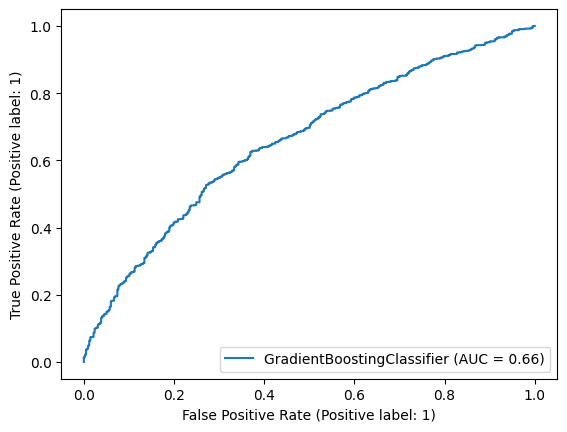

In [11]:
print('---- Original Data ----')
model = GradientBoostingClassifier()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Under Sample Data ----')
model = GradientBoostingClassifier()
model.fit(under_train_x, under_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)

print('---- Over Sample Data ----')
model = GradientBoostingClassifier()
model.fit(over_train_x, over_train_y)

pred_y = model.predict(test_x)

result_report(model, test_x, test_y, pred_y)
